In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow as tf

In [6]:


def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

def get_avg_returns(logdirs):
    avg_returns = []
    time_steps = []
    for logdir in logdirs:
        eventfile = glob.glob(logdir)[0]
        X, Y = get_section_results(eventfile)
        avg_returns.append(Y)
        time_steps.append(X)
        
    return time_steps, avg_returns    

In [51]:
double_dqn_logdirs = []
dqn_logdirs = []
for i in range(1,11):
    double_dqn = f'data/q2_doubledqn_{i}_LunarLander-v3_18-03-2023_00-51-23/events*'
    dqn = f'data/q2_dqn_{i}_LunarLander-v3_18-03-2023_00-51-23/events*'
    double_dqn_logdirs.append(double_dqn)
    dqn_logdirs.append(dqn)

ddqn_steps, double_dqn_returns = get_avg_returns(double_dqn_logdirs)
dqn_steps, dqn_returns = get_avg_returns(dqn_logdirs)        


In [57]:
double_dqn_logdirs = []
dqn_logdirs = []
for i in range(1,4):
    double_dqn = f'data/q2_doubledqn_{i}_LunarLander-v3_17-03-2023_23-23-21/events*'
    dqn = f'data/q2_dqn_{i}_LunarLander-v3_17-03-2023_23-23-21/events*'
    double_dqn_logdirs.append(double_dqn)
    dqn_logdirs.append(dqn)

ddqn_steps, double_dqn_returns = get_avg_returns(double_dqn_logdirs)
dqn_steps, dqn_returns = get_avg_returns(dqn_logdirs)        


In [58]:
ddqn_np = np.array(double_dqn_returns)
dqn_np = np.array(dqn_returns)

print(dqn_np.shape)
print(ddqn_np.shape)

(3, 49)
(3, 49)


In [59]:
ddqn_steps_np = np.array(ddqn_steps)[:,:-1]
dqn_steps_np = np.array(dqn_steps)[:,:-1]

print(ddqn_steps_np.shape)
print(dqn_steps_np.shape)




(3, 49)
(3, 49)


<AxesSubplot:>

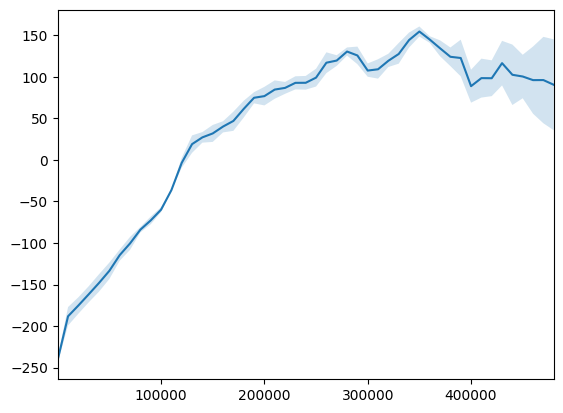

In [60]:
sns.tsplot(time=ddqn_steps_np[0], data=ddqn_np)

<AxesSubplot:>

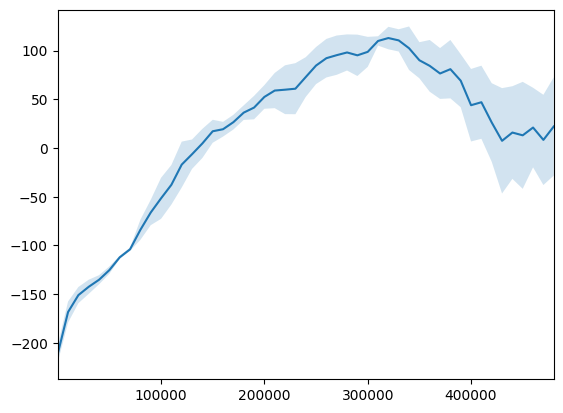

In [61]:
sns.tsplot(time=dqn_steps_np[0], data=dqn_np)

<AxesSubplot:>

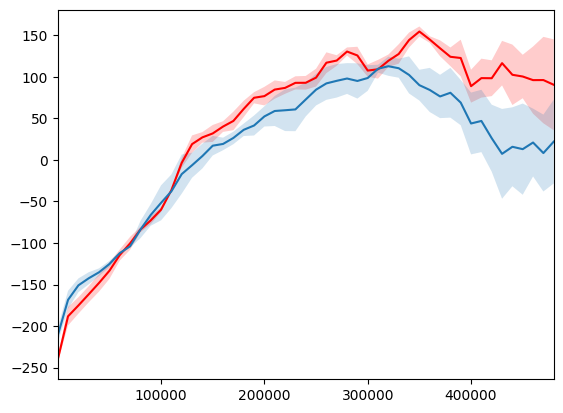

In [62]:
sns.tsplot(time=ddqn_steps_np[0], data=ddqn_np, color='r')
sns.tsplot(time=dqn_steps_np[0], data=dqn_np)